In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm import tqdm
from datetime import datetime
from problems import SimpleGaussian

In [2]:
N = 10_000_000  # num samples to draw
T = 50 # Num tests per dimension
Ds = list(range(1,11))

In [3]:
results = pd.DataFrame(index=Ds, columns=['pcntError_mean', 'pcntError_std','time_mean', 'time_std', 'N_mean', 'N_std'])

In [4]:
def smc_test(D):
    d = {}
    problem = SimpleGaussian(D)
    start_time = datetime.now()
    xs = problem.p.rvs(N)
    ys = problem.d.pdf(xs).reshape(-1)
    I_hat = np.mean(ys)
    end_time = datetime.now()
    d['N'] = N
    d['pcntError'] = 100 * (I_hat - problem.answer) / problem.answer
    d['time'] =  (end_time - start_time).total_seconds()
    return d

In [5]:
for D in tqdm(Ds):
    experiments = [smc_test(D) for t in range(T)]
    experiments = pd.DataFrame(experiments, columns=['pcntError', 'N', 'time'])
    results.loc[D, 'pcntError_mean'] = experiments['pcntError'].mean()
    results.loc[D, 'pcntError_std'] = experiments['pcntError'].std()
    results.loc[D, 'time_mean'] = experiments['time'].mean()
    results.loc[D, 'time_std'] = experiments['time'].std()
    results.loc[D, 'N_mean'] = experiments['N'].mean()
    results.loc[D, 'N_std'] = experiments['N'].std()

100%|██████████| 10/10 [09:56<00:00, 59.66s/it]


In [6]:
results

,pcntError_mean,pcntError_std,time_mean,time_std,N_mean,N_std
1,-0.0021023,0.0812414,0.346355,0.00965581,1e+07,0
2,-0.0630439,0.236626,0.766278,0.0846446,1e+07,0
3,0.318212,0.735666,0.914731,0.168117,1e+07,0
4,-0.107236,2.12495,0.953843,0.0485126,1e+07,0
5,-0.907543,4.76906,1.15533,0.108609,1e+07,0
6,-3.25213,15.8657,1.20608,0.0253185,1e+07,0
7,5.33065,40.641,1.49403,0.155307,1e+07,0
8,9.69361,170.446,1.52286,0.0679167,1e+07,0
9,-42.8578,162.633,1.69384,0.0934087,1e+07,0
10,-29.4033,198.99,1.86377,0.134223,1e+07,0


In [7]:
# results.to_csv('./SimpleGaussian_SMC.csv')

In [8]:
def plot_column(column, color):
    y1 = list(results[column+'_mean'] - results[column+'_std'])
    y2 = list(results[column+'_mean'])
    y3 = list(results[column+'_mean'] + results[column+'_std'])
    plt.plot(Ds, y2, color=color)
    plt.fill_between(Ds, y1, y3, color=color, alpha=0.3)

Text(0.5, 1.0, 'Percentage Error vs Dimension')

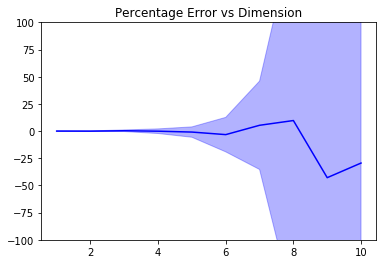

In [9]:
plot_column('pcntError', 'blue')
plt.ylim([-100,100])
plt.title('Percentage Error vs Dimension')

Text(0.5, 1.0, 'Time Taken(seconds) vs Dimension')

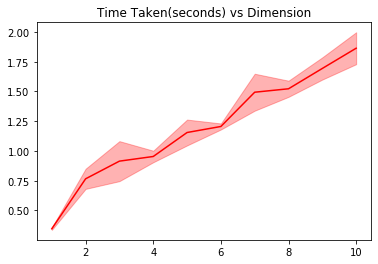

In [10]:
plot_column('time', 'red')
plt.title('Time Taken(seconds) vs Dimension')